In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

In [ ]:
train = pd.read_csv("./data/train.csv")
test  = pd.read_csv("./data/test.csv")

# Feature engineering

In [89]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [88]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-16 00:00:00,1,0,0,1,10.66,15.150,56,0.0000
1,2011-01-16 01:00:00,1,0,0,1,10.66,13.635,56,8.9981
2,2011-01-16 02:00:00,1,0,0,1,10.66,14.395,56,6.0032
3,2011-01-16 03:00:00,1,0,0,1,9.02,13.635,69,0.0000
4,2011-01-16 04:00:00,1,0,0,1,10.66,12.880,56,11.0014


In [ ]:
train.shape, test.shape

# Draw graphs

In [ ]:
length = train.shape[1]
def draw_histogram(data, features, rows, cols):
    fig = plt.figure(figsize=(10, 20))
    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i + 1)
        data[feature].hist(bins = 20, ax = ax)
        ax.set_title(feature + " distribution")
    fig.tight_layout()
    plt.show()

draw_histogram(train, train.columns, length / 2, 2)   
        

# handle missing value

In [ ]:
# np.isnan(train).any() for np array
# find the total number of nan in the data
train.isnull().sum()

In [ ]:
train.isnull().values.any(), test.isnull().values.any()

In [ ]:
test.isnull().sum()

# handle discrete datetime value

In [128]:
datetime = train.datetime.str[11:13]
train_datetime_segged = train.copy()
train_datetime_segged["datetime_cropped"] = datetime.astype(str).astype(int)
train_datetime_segged.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime_cropped
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [130]:
testdatetime = test.datetime.str[11:13]
test_datetime_segged = test.copy()
test_datetime_segged["datetime_cropped"] = testdatetime.astype(str).astype(int)
test_datetime_segged.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime_cropped
0,2011-01-16 00:00:00,1,0,0,1,10.66,15.150,56,0.0000,0
1,2011-01-16 01:00:00,1,0,0,1,10.66,13.635,56,8.9981,1
2,2011-01-16 02:00:00,1,0,0,1,10.66,14.395,56,6.0032,2
3,2011-01-16 03:00:00,1,0,0,1,9.02,13.635,69,0.0000,3
4,2011-01-16 04:00:00,1,0,0,1,10.66,12.880,56,11.0014,4


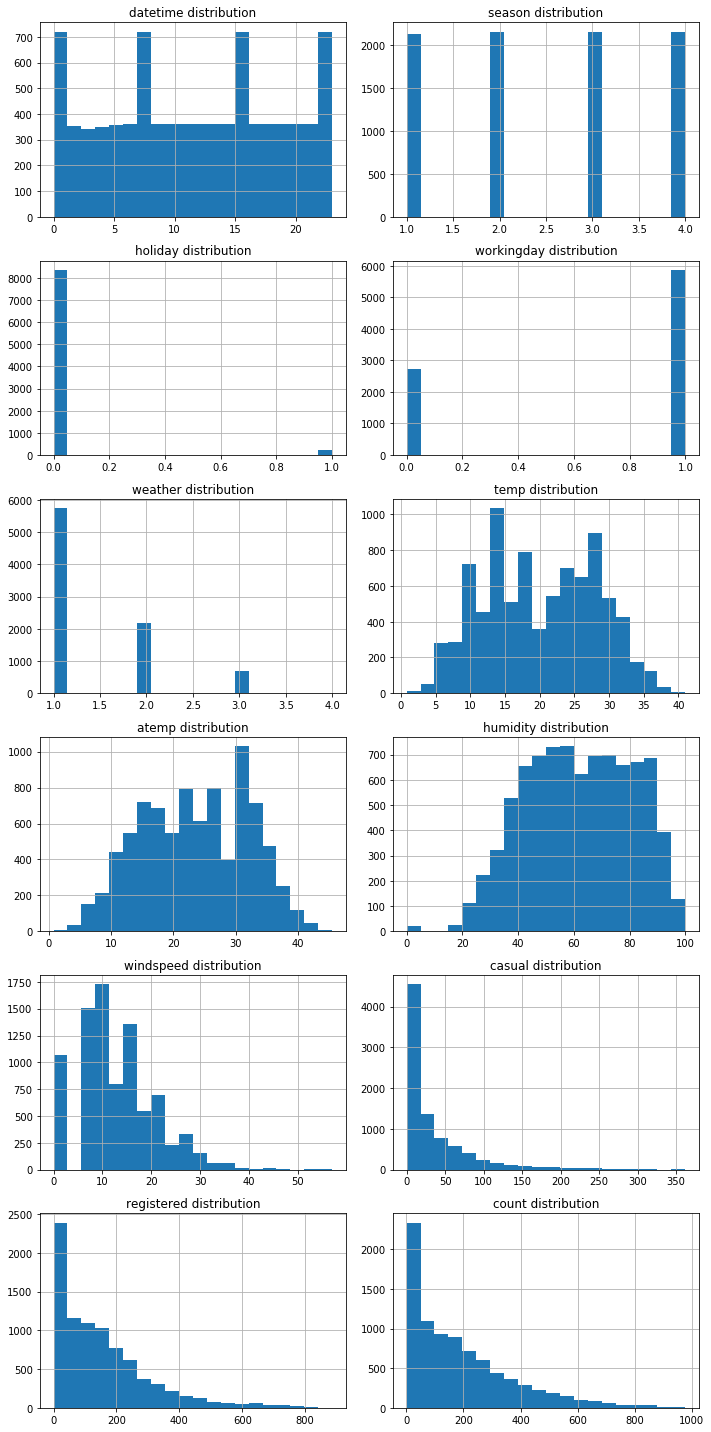

In [102]:
draw_histogram(train_datetime_segged, train_datetime_segged.columns, length / 2, 2)  

# handle longtail value

In [131]:
train_datetimesegged_logged = train_datetime_segged.copy()
train_datetimesegged_logged["casual_log"] = np.log(train_datetimesegged_logged.casual + 1)
train_datetimesegged_logged["registered_log"] = np.log(train_datetimesegged_logged.registered + 1)
#not sure if needs to handle long tail label
#train_datetimesegged_logged.count_log = np.log(train_datetimesegged_count.casual + 1)
train_datetimesegged_logged.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime_cropped,casual_log,registered_log
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1.386294,2.639057
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,2.197225,3.496508
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1.791759,3.332205
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1.386294,2.397895
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,0.000000,0.693147


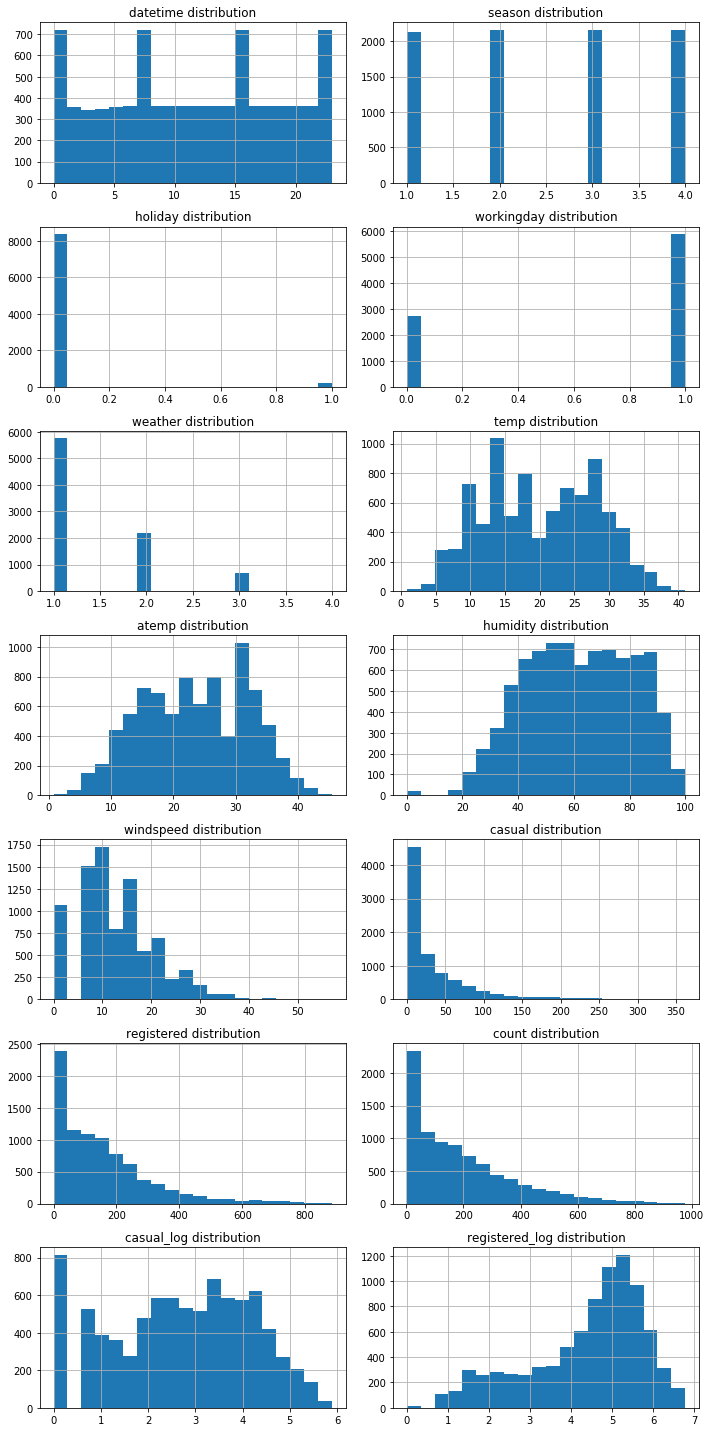

In [104]:
newLength = train_datetimesegged_logged.shape[1]
draw_histogram(train_datetimesegged_logged, train_datetimesegged_logged.columns, newLength / 2, 2)  

# construct X and y

In [186]:
test_datetime_segged.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime_cropped
0,2011-01-16 00:00:00,1,0,0,1,10.66,15.150,56,0.0000,0
1,2011-01-16 01:00:00,1,0,0,1,10.66,13.635,56,8.9981,1
2,2011-01-16 02:00:00,1,0,0,1,10.66,14.395,56,6.0032,2
3,2011-01-16 03:00:00,1,0,0,1,9.02,13.635,69,0.0000,3
4,2011-01-16 04:00:00,1,0,0,1,10.66,12.880,56,11.0014,4


In [190]:
y = train_datetime_segged["count"]
X = train_datetime_segged.drop(["count","datetime","casual","registered"], axis = 1)
X.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime_cropped
0,1,0,0,1,9.84,14.395,81,0.0,0
1,1,0,0,1,9.02,13.635,80,0.0,1
2,1,0,0,1,9.02,13.635,80,0.0,2
3,1,0,0,1,9.84,14.395,75,0.0,3
4,1,0,0,1,9.84,14.395,75,0.0,4


In [191]:
Xtest = test_datetime_segged.drop("datetime", axis = 1)

In [192]:
Xtest.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime_cropped
0,1,0,0,1,10.66,15.150,56,0.0000,0
1,1,0,0,1,10.66,13.635,56,8.9981,1
2,1,0,0,1,10.66,14.395,56,6.0032,2
3,1,0,0,1,9.02,13.635,69,0.0000,3
4,1,0,0,1,10.66,12.880,56,11.0014,4


# Find the most unrelated features

In [193]:
# 1. using Naive Bayes model
X.shape, y.shape

((8600, 9), (8600,))

In [59]:
# CANNOT use NB to do feature selection, as this is regression
# every time drop one feature, then do cross validation for the remaining data
'''
from sklearn.naive_bayes import BernoulliNB
def NB_classify(drop_var, X, y):
    model = BernoulliNB()
    scores = cross_val_score(model,
                             X.drop(drop_var, axis = 1),
                             y, 
                            cv = 4,
                            scoring = "neg_mean_squared_log_error")
    return np.mean(scores)
'''
# got "The least populated class in y has only 1 members, which is too few. The minimum number of members 
# in any class cannot be less than n_splits=4." if using NB to do cross_val
# as this is regression
'''
from sklearn.linear_model import LogisticRegression
def LR_Regression(drop_var, X, y):
    model = LogisticRegression()
    scores = cross_val_score(model,
                             X.drop(drop_var, axis = 1),
                             y, 
                            cv = 4,
                            scoring = "neg_mean_squared_log_error")
    return np.mean(scores)
'''

In [139]:
'''
scores = dict()
for col in X.columns:
    score = LR_Regression(col, X, y)
    scores[col] = score
'''

(8600, 15)

In [194]:
mat = pd.concat([X,y], axis = 1)
mat = mat.corr()
mat

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime_cropped,count
season,1.000000,0.091338,-0.030821,0.011746,0.291688,0.302915,0.214066,-0.157129,-0.005848,0.178462
holiday,0.091338,1.000000,-0.247918,-0.011177,0.041898,0.037992,0.025504,-0.007389,-0.000066,0.010196
workingday,-0.030821,-0.247918,1.000000,0.017897,0.003680,-0.000643,-0.052684,0.032801,0.002075,0.009302
weather,0.011746,-0.011177,0.017897,1.000000,-0.042833,-0.042787,0.402360,0.017854,-0.025713,-0.125429
temp,0.291688,0.041898,0.003680,-0.042833,1.000000,0.992421,-0.058802,-0.012702,0.143520,0.397756
atemp,0.302915,0.037992,-0.000643,-0.042787,0.992421,1.000000,-0.038796,-0.052349,0.139620,0.397693
humidity,0.214066,0.025504,-0.052684,0.402360,-0.058802,-0.038796,1.000000,-0.311464,-0.285588,-0.320982
windspeed,-0.157129,-0.007389,0.032801,0.017854,-0.012702,-0.052349,-0.311464,1.000000,0.147226,0.116592
datetime_cropped,-0.005848,-0.000066,0.002075,-0.025713,0.143520,0.139620,-0.285588,0.147226,1.000000,0.400160
count,0.178462,0.010196,0.009302,-0.125429,0.397756,0.397693,-0.320982,0.116592,0.400160,1.000000


In [195]:
mat.shape

(10, 10)

In [196]:
type(mat)

pandas.core.frame.DataFrame

In [197]:
cor = mat["count"]
cor

season              0.178462
holiday             0.010196
workingday          0.009302
weather            -0.125429
temp                0.397756
atemp               0.397693
humidity           -0.320982
windspeed           0.116592
datetime_cropped    0.400160
count               1.000000
Name: count, dtype: float64

In [198]:
type(cor)

pandas.core.series.Series

In [199]:
truecor = cor.abs().sort_values(ascending=True)
truecor

workingday          0.009302
holiday             0.010196
windspeed           0.116592
weather             0.125429
season              0.178462
humidity            0.320982
atemp               0.397693
temp                0.397756
datetime_cropped    0.400160
count               1.000000
Name: count, dtype: float64

# drop columns unrelated for both train and test

In [216]:
Xselected = X[truecor[2:9].index]
Xselected.head()

,windspeed,weather,season,humidity,atemp,temp,datetime_cropped
0,0.0,1,1,81,14.395,9.84,0
1,0.0,1,1,80,13.635,9.02,1
2,0.0,1,1,80,13.635,9.02,2
3,0.0,1,1,75,14.395,9.84,3
4,0.0,1,1,75,14.395,9.84,4


In [217]:
XtestSelected.head()

,windspeed,weather,season,humidity,atemp,temp,datetime_cropped
0,0.0000,1,1,56,15.150,10.66,0
1,8.9981,1,1,56,13.635,10.66,1
2,6.0032,1,1,56,14.395,10.66,2
3,0.0000,1,1,69,13.635,9.02,3
4,11.0014,1,1,56,12.880,10.66,4


In [218]:
XtestSelected = test_datetime_segged[truecor[2:9].index]
XtestSelected.head()

,windspeed,weather,season,humidity,atemp,temp,datetime_cropped
0,0.0000,1,1,56,15.150,10.66,0
1,8.9981,1,1,56,13.635,10.66,1
2,6.0032,1,1,56,14.395,10.66,2
3,0.0000,1,1,69,13.635,9.02,3
4,11.0014,1,1,56,12.880,10.66,4


# Use sklearn class method selectKBest to do feature filtering

In [204]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k = 7).fit(X, y)
features = selector.transform(X)

mask = selector.get_support()
newFeatures = []
abandanedFeatures = []
for bool, feature in zip(mask, X.columns):
    if  bool:  
        newFeatures.append(feature)
    else:
        abandanedFeatures.append(feature)

#X_new = pd.DataFrame(features, columns = newFeatures )
abandanedFeatures

['holiday', 'weather']

# Logistic Regression

In [205]:
from sklearn.linear_model import LogisticRegression

model_LR = LogisticRegression()
model_LR.fit(Xselected, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [206]:
pred_LR = model_LR.predict(XtestSelected)

In [207]:
submissionLR = pd.DataFrame({"datetime": test.datetime, "count": pred_LR})
submissionLR.to_csv("./output/submission_LR_2.csv",
                    columns = ["datetime", "count"],
                    header  = True,
                    index   = False)

# pprint for pretty print of model parameters

In [222]:
from pprint import pprint

In [223]:
pprint(model_LR.get_params())

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


# Using CV to choose hyper parameters

In [224]:
from sklearn.model_selection import GridSearchCV

In [225]:
param_grid = {
    "penalty": ["l1", "l2"],
    "class_weight":["balanced", None],
    "C": [0.1, 1, 10]
}
modelLRCV = GridSearchCV(estimator = model_LR,
                        param_grid=param_grid,
                        scoring = "neg_mean_squared_log_error",
                        verbose = 1,
                        n_jobs = -1)
modelLRCV.fit(X, y)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
Process ForkPoolWorker-17:
Process ForkPoolWorker-18:
Process ForkPoolWorker-19:
Process ForkPoolWorker-20:
Process ForkPoolWorker-21:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/ana

KeyboardInterrupt: 

In [ ]:
best_parameters = modelLRCV.best_params_

In [210]:
best_parameters = {}

# use the best paramets just got by gridsearch to train new lr models

In [ ]:
modelLRBest = LogisticRegression()
modelLRBest.fit(Xselected, y)
predLRBest = modelLRBest.predict(XtestSelected)

In [ ]:
submissionLRBest = pd.DataFrame({"datetime": test.datetime, "count": predLRBest})
submissionLRBest.to_csv("./output/submission_LRBest.csv",
                    columns = ["datetime", "count"],
                    header  = True,
                    index   = False)

# Random Forest

In [167]:
from sklearn.ensemble import RandomForestRegressor

In [168]:
modelRFRe = RandomForestRegressor(n_jobs=-1)

In [211]:
X.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime_cropped
0,1,0,0,1,9.84,14.395,81,0.0,0
1,1,0,0,1,9.02,13.635,80,0.0,1
2,1,0,0,1,9.02,13.635,80,0.0,2
3,1,0,0,1,9.84,14.395,75,0.0,3
4,1,0,0,1,9.84,14.395,75,0.0,4


In [212]:
modelRFRe.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [214]:
XtestSelected.head()

,windspeed,weather,season,humidity,atemp,temp,datetime_cropped
0,0.0000,1,1,56,15.150,10.66,0
1,8.9981,1,1,56,13.635,10.66,1
2,6.0032,1,1,56,14.395,10.66,2
3,0.0000,1,1,69,13.635,9.02,3
4,11.0014,1,1,56,12.880,10.66,4


In [219]:
predRFRe = modelRFRe.predict(Xtest)

In [221]:
submissionRFRe = pd.DataFrame({"datetime": test.datetime, "count": predRFRe})
submissionRFRe.to_csv("./output/submission_RFRe.csv",
                    columns = ["datetime", "count"],
                    header  = True,
                    index   = False)